**Random Forest Classification**

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('universal_top_spotify_songs.csv')

**EDA**

In [3]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,1,2,0,NaN,2023-11-29,100,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,1
1,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,2,3,0,NaN,2023-11-29,97,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.1580,0.121,113.950,4
2,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,Mariah Carey,3,-2,14,NaN,2023-11-29,93,False,...,7,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4
3,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,4,3,1,NaN,2023-11-29,93,True,...,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,4
4,06qMRF18gwbOYYbnP2du6i,Last Christmas - Single Version,Wham!,5,-3,16,NaN,2023-11-29,81,False,...,2,-8.228,1,0.0278,0.2120,0.000004,0.1560,0.935,107.732,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156483 entries, 0 to 156482
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          156483 non-null  object 
 1   name                156462 non-null  object 
 2   artists             156462 non-null  object 
 3   daily_rank          156483 non-null  int64  
 4   daily_movement      156483 non-null  int64  
 5   weekly_movement     156483 non-null  int64  
 6   country             154377 non-null  object 
 7   snapshot_date       156483 non-null  object 
 8   popularity          156483 non-null  int64  
 9   is_explicit         156483 non-null  bool   
 10  duration_ms         156483 non-null  int64  
 11  album_name          156452 non-null  object 
 12  album_release_date  156452 non-null  object 
 13  danceability        156483 non-null  float64
 14  energy              156483 non-null  float64
 15  key                 156483 non-nul

**Feature Engineeering**


1. Handling missing value

In [5]:
pd.isnull(df).sum()

spotify_id               0
name                    21
artists                 21
daily_rank               0
daily_movement           0
weekly_movement          0
country               2106
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name              31
album_release_date      31
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

2. Drop colums that are not really corelated with our model

In [6]:
drop_columns = ['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement', 'country', 'snapshot_date',
                   'album_name', 'album_release_date', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

df_spotify = df.drop(columns = drop_columns)

In [7]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156483 entries, 0 to 156482
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   popularity      156483 non-null  int64
 1   is_explicit     156483 non-null  bool 
 2   key             156483 non-null  int64
 3   mode            156483 non-null  int64
 4   time_signature  156483 non-null  int64
dtypes: bool(1), int64(4)
memory usage: 4.9 MB


3. Drop the rows into 1000 records

In [8]:
df_spotify = df_spotify.iloc[:1001]

In [9]:
df_spotify.shape

(1001, 5)

In [10]:
#Encode the is_explicit column
df_spotify['is_explicit'] = df_spotify['is_explicit'].astype(int)

In [11]:
df_spotify.head()

,popularity,is_explicit,key,mode,time_signature
0,100,1,6,0,1
1,97,0,9,1,4
2,93,0,7,1,4
3,93,1,2,1,4
4,81,0,2,1,4


**Split Data into Train and Test Data**

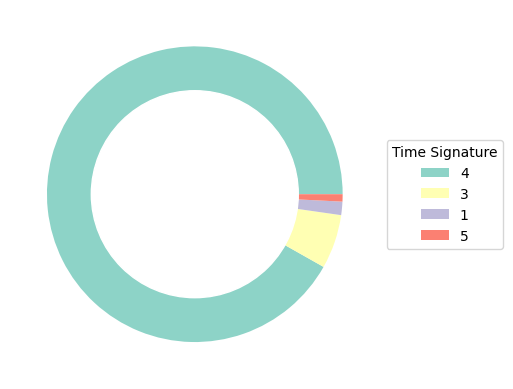

In [15]:
ts_count = df['time_signature'].value_counts().reset_index()
ts_count.columns = ['time_signature', 'count']

colors = sns.color_palette('Set3', len(ts_count))

plt.pie(ts_count['count'], labels=None, colors=colors)
plt.legend(labels=ts_count['time_signature'], title="Time Signature", loc="center left", bbox_to_anchor=(1, 0.5))

ts_donut = plt.Circle((0, 0), 0.7, color='white')
ts = plt.gcf()
ts.gca().add_artist(ts_donut)

plt.show()

In [12]:
input_df = df_spotify.drop('time_signature',axis=1)
output_df = df_spotify['time_signature']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
y_predict=RF_class.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','3','4','5']))


Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           3       0.00      0.00      0.00        15
           4       0.91      1.00      0.95       180
           5       0.00      0.00      0.00         2

    accuracy                           0.92       201
   macro avg       0.48      0.50      0.49       201
weighted avg       0.84      0.92      0.88       201



**Hyperparamater Tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [ ]:
RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

In [ ]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 8}
Accuracy : 0.9324999999999999


In [ ]:
#Train the data using based parameter
RF_class_best = RandomForestClassifier(criterion= 'gini',max_depth=6)

In [ ]:
RF_class_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=6)

In [ ]:
y_predict_best=RF_class_best.predict(x_test)

In [ ]:
print(classification_report(y_test, y_predict_best, target_names=['1','3','4','5']))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           3       0.00      0.00      0.00        15
           4       0.92      1.00      0.96       180
           5       0.00      0.00      0.00         2

    accuracy                           0.92       201
   macro avg       0.48      0.50      0.49       201
weighted avg       0.84      0.92      0.88       201



**Model Evaluation:**


From the report, we can conclude that the one using autotuned parameters (max-depth = 8) emerged as the most accurate model (93%), while the ones with tuned parameters (max-depth = 4 & 6) both achieved a 92% of accuracy level and both performed a good balance at predicting class 1.